# Alucar - Analisando as vendas

In [2]:
import pandas as pd

In [3]:
alucar = pd.read_csv('dados/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print(f'Quantidade de coluna: {alucar.shape[1]}\nQuantidade de linhas: {alucar.shape[0]}')

Quantidade de coluna: 2
Quantidade de linhas: 24


In [5]:
print(f'Quantidade de dados nulos: {alucar.isna().sum().sum()}')

Quantidade de dados nulos: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
print(sns.__version__)

0.9.0


<Axes: xlabel='mes', ylabel='vendas'>

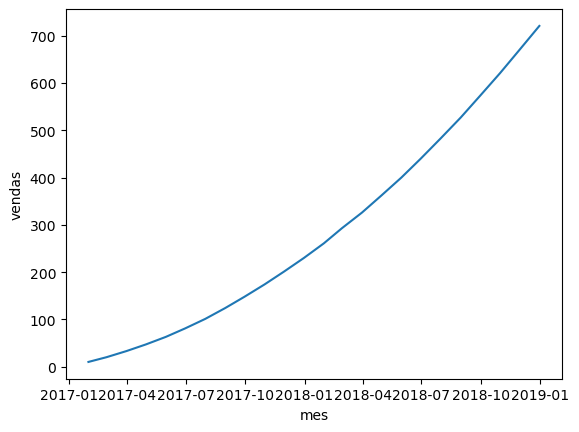

In [10]:
sns.lineplot(x='mes', y='vendas', data=alucar)

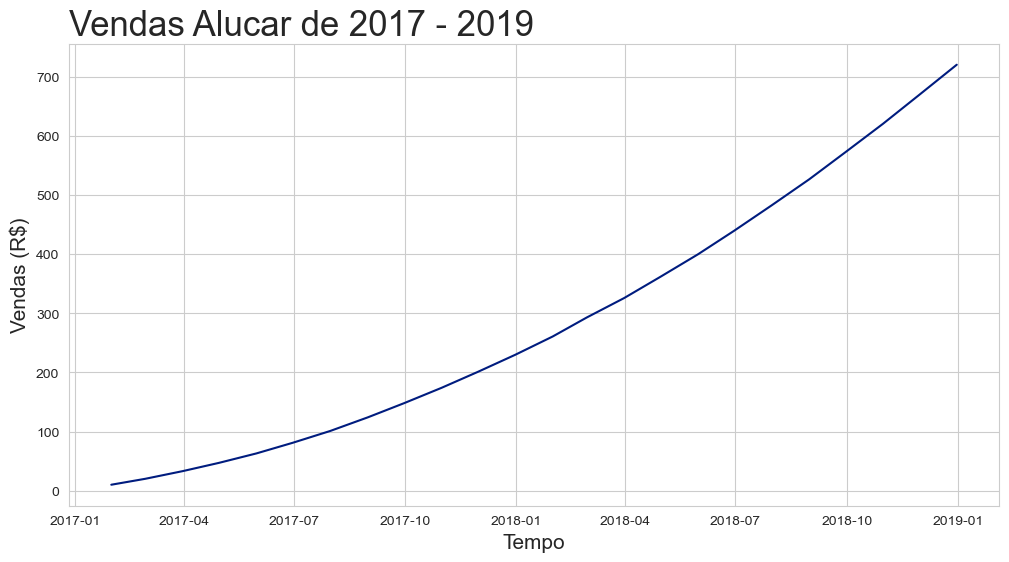

In [11]:
sns.set_palette(sns.color_palette("dark"))
sns.set_style('whitegrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 - 2019', fontsize=25, loc='left')
ax.set_xlabel('Tempo', fontsize=15)
ax.set_ylabel('Vendas (R$)', fontsize=15)
ax = ax

In [12]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [13]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


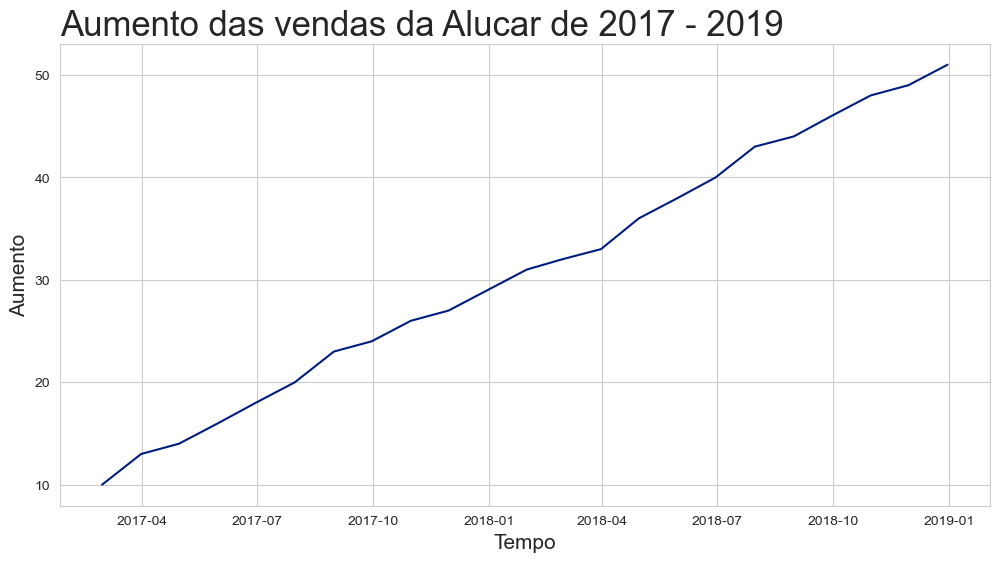

In [14]:
sns.set_palette(sns.color_palette("dark"))
sns.set_style('whitegrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas da Alucar de 2017 - 2019', fontsize=25, loc='left')
ax.set_xlabel('Tempo', fontsize=15)
ax.set_ylabel('Aumento', fontsize=15)
ax = ax

In [15]:
def plotar(titulo, labelx, labely, x, y, dataframe):
    sns.set_palette(sns.color_palette("dark"))
    sns.set_style('whitegrid')
    ax = sns.lineplot(x=x, y=y, data=dataframe)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, fontsize=25, loc='left')
    ax.set_xlabel(labelx, fontsize=15)
    ax.set_ylabel(labely, fontsize=15)
    ax = ax

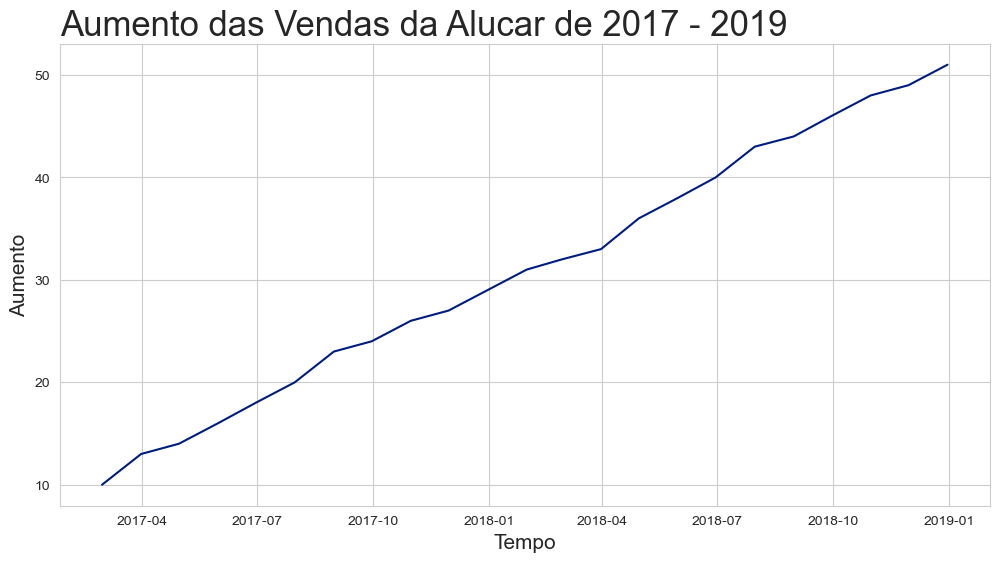

In [16]:
plotar('Aumento das Vendas da Alucar de 2017 - 2019', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [17]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


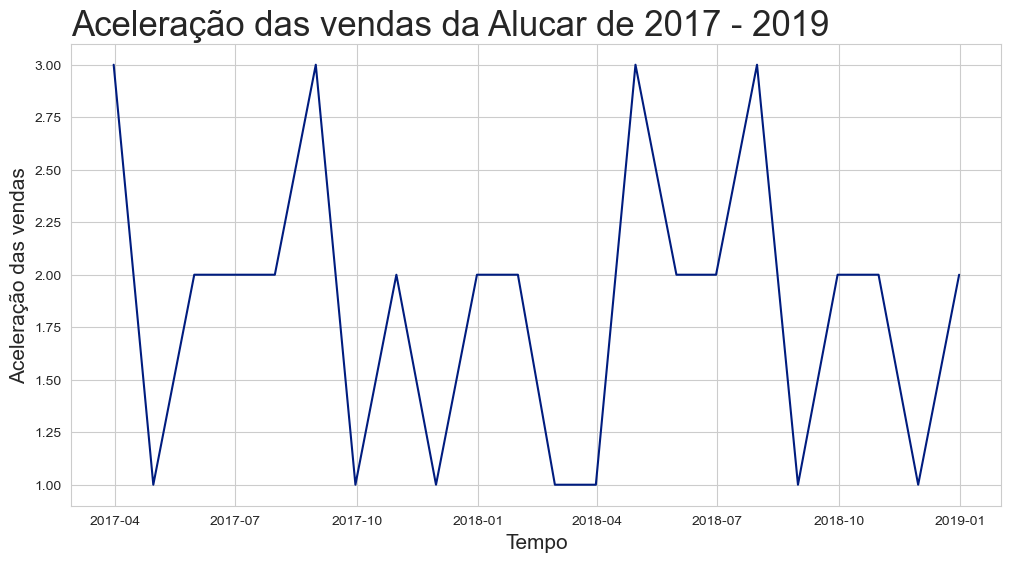

In [18]:
plotar('Aceleração das vendas da Alucar de 2017 - 2019', 'Tempo', 'Aceleração das vendas', 'mes', 'aceleracao', alucar)

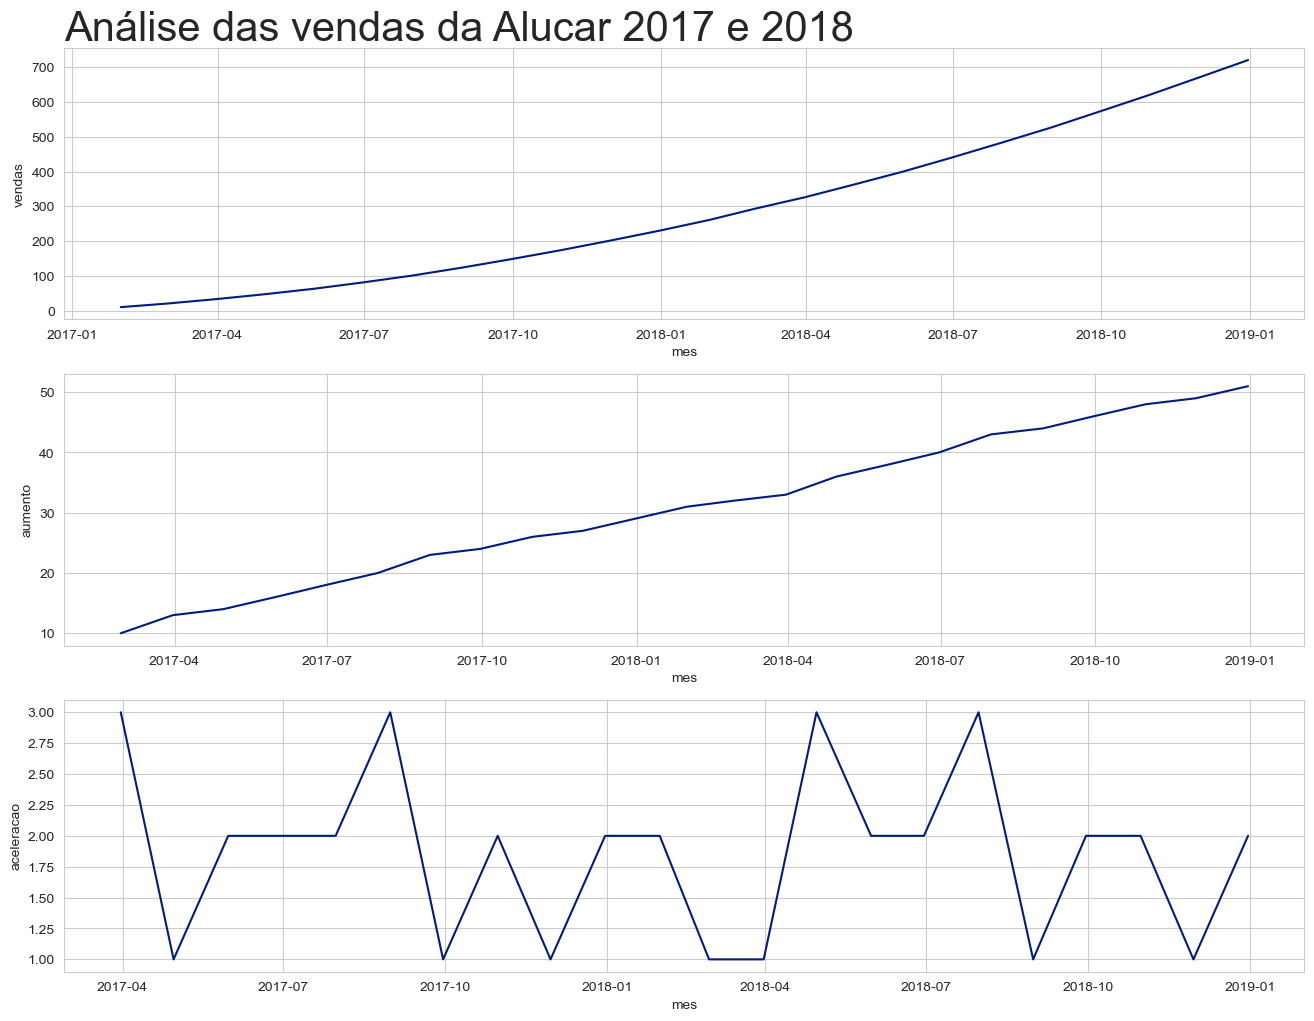

In [19]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018',fontsize=30, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [20]:
def plot_comparacao(x='mes', y1='vendas', y2='aumento', y3='aceleracao', 
                    dataset=alucar, titulo='Análise das vendas da Alucar 2017 e 2018'):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=30, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

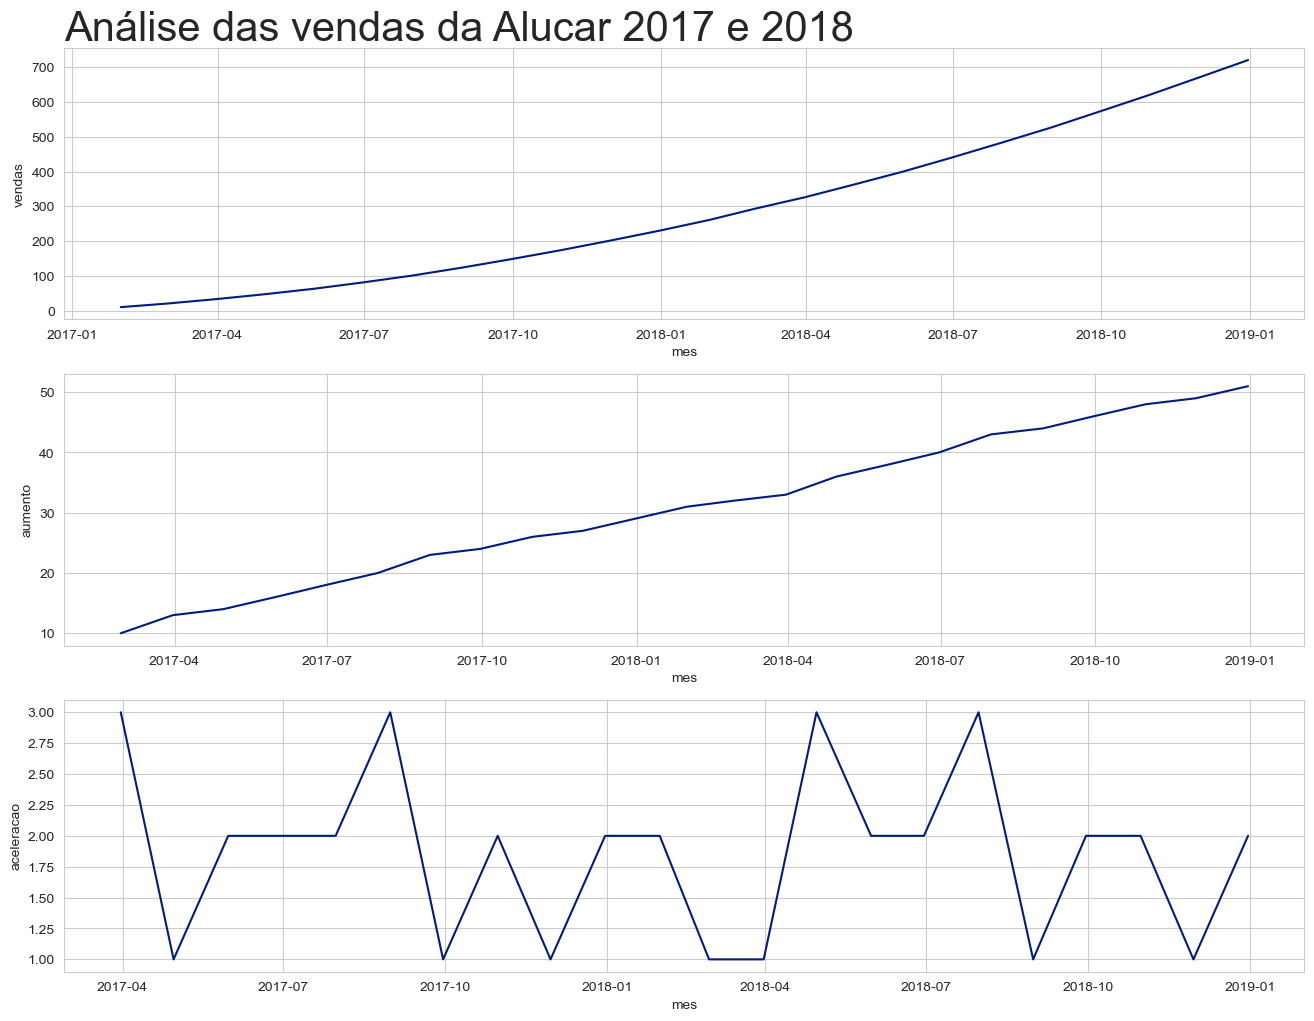

In [21]:
plot_comparacao()

In [22]:
from pandas.plotting import autocorrelation_plot

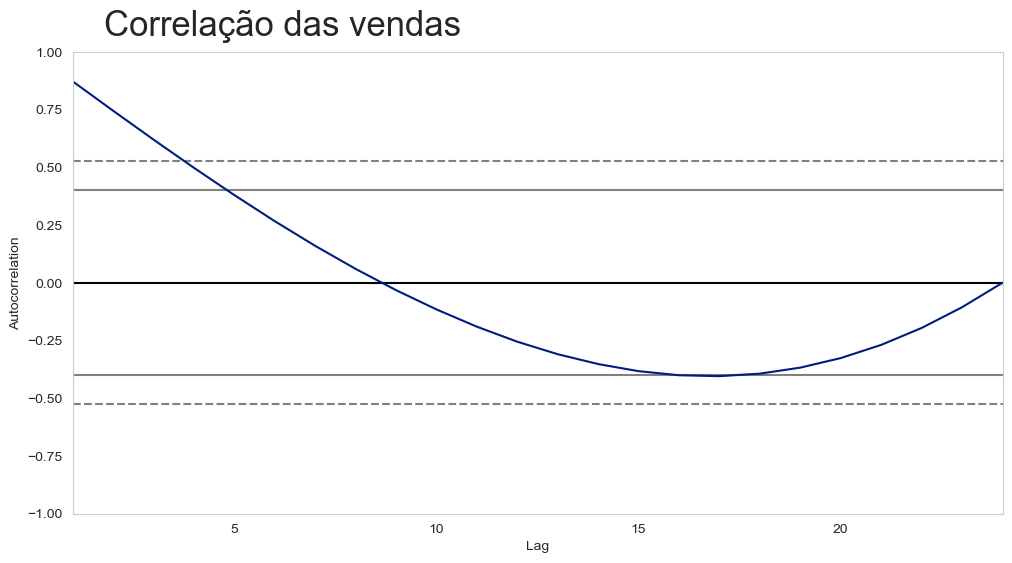

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=25, x=0.30, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

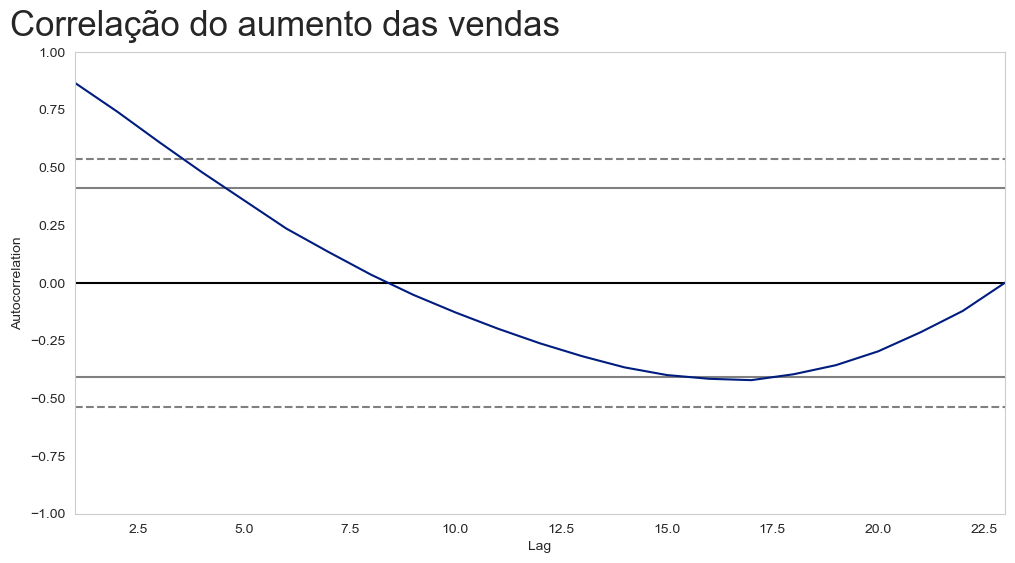

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas', fontsize=25, x=0.30, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

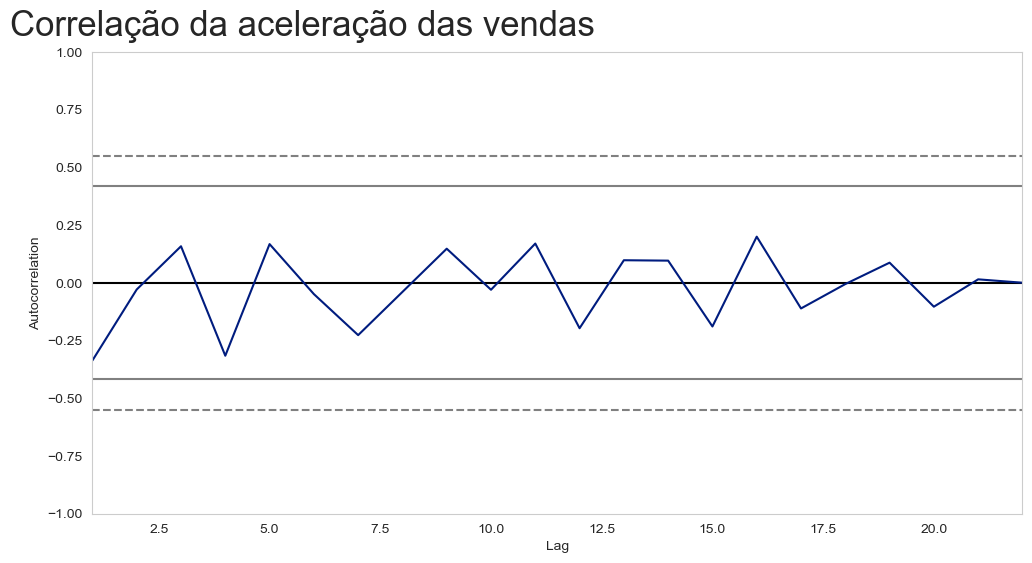

In [25]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas', fontsize=25, x=0.30, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [26]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [27]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [28]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [29]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [30]:
print(f'Quantidade de linhas: {assinantes.shape[0]}\nQuantidade de colunas: {assinantes.shape[1]}')

Quantidade de linhas: 24
Quantidade de colunas: 2


In [31]:
print(f'Quantidade de dados nulos: {assinantes.isna().sum().sum()}')

Quantidade de dados nulos: 0


In [32]:
assinantes['aumento'] = assinantes['assinantes'].diff()

In [33]:
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [34]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


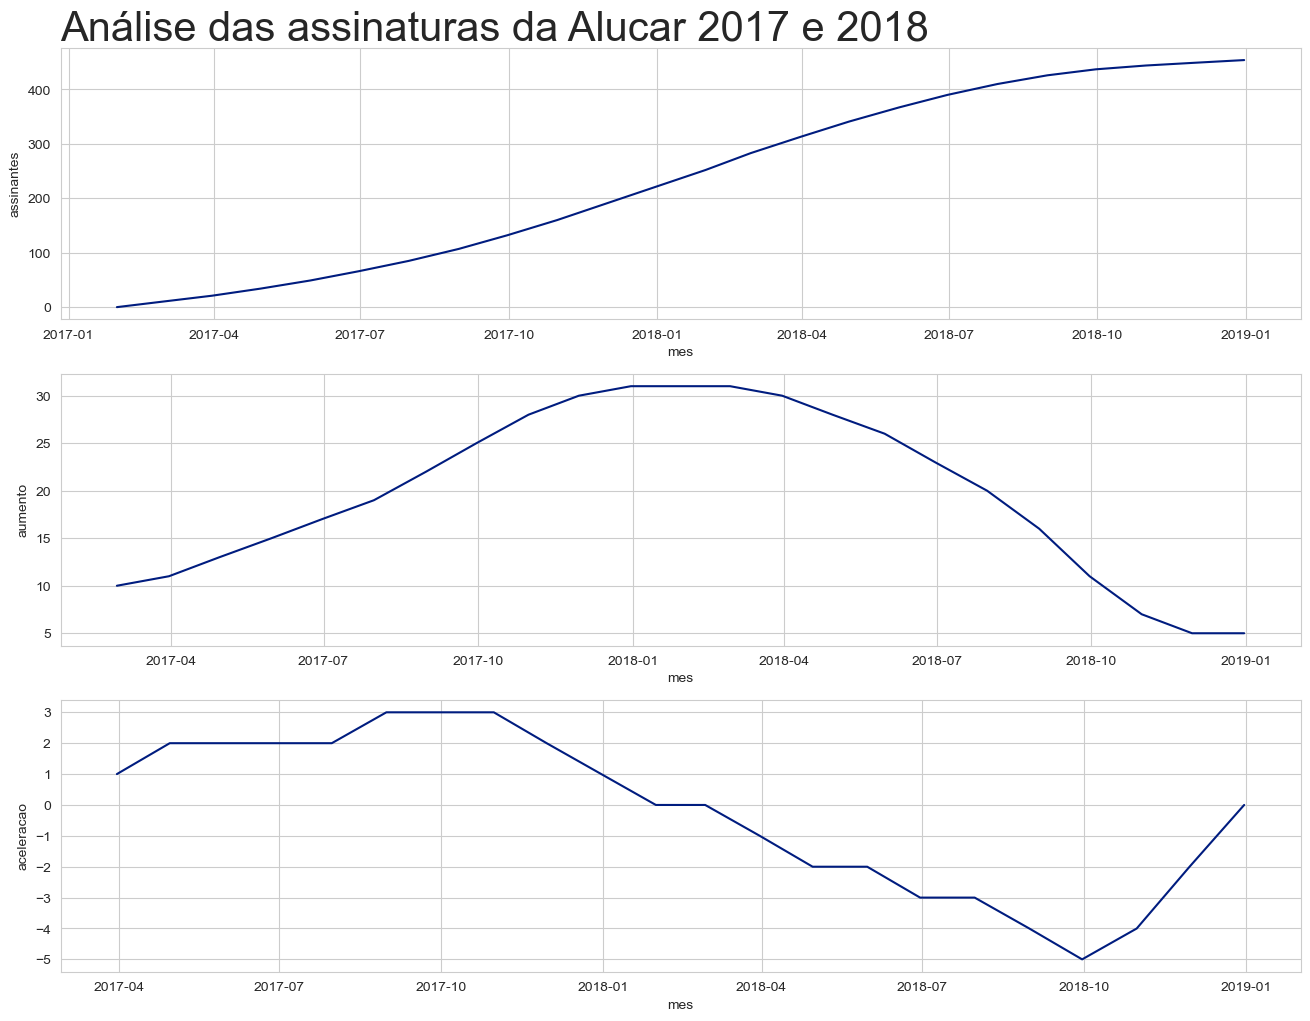

In [35]:
plot_comparacao(y1='assinantes', dataset=assinantes, titulo='Análise das assinaturas da Alucar 2017 e 2018')

# Chocolura - Analisando as vendas

In [36]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [37]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [38]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [39]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [40]:
chocolura.head()

,mes,vendas
0,2017-01-01,210
1,2017-02-01,185
2,2017-03-01,209
3,2017-04-01,280
4,2017-05-01,211


In [41]:
print(f'Quantida de linhas:{chocolura.shape[0]}\nQuantidade de colunas: {chocolura.shape[1]}')
print(f'Quantidade de dados nulos: {chocolura.isna().sum().sum()}')

Quantida de linhas:24
Quantidade de colunas: 2
Quantidade de dados nulos: 0


In [42]:
chocolura['aumento'] = chocolura['vendas'].diff()

In [43]:
chocolura['aceleracao'] = chocolura['aumento'].diff()

In [44]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


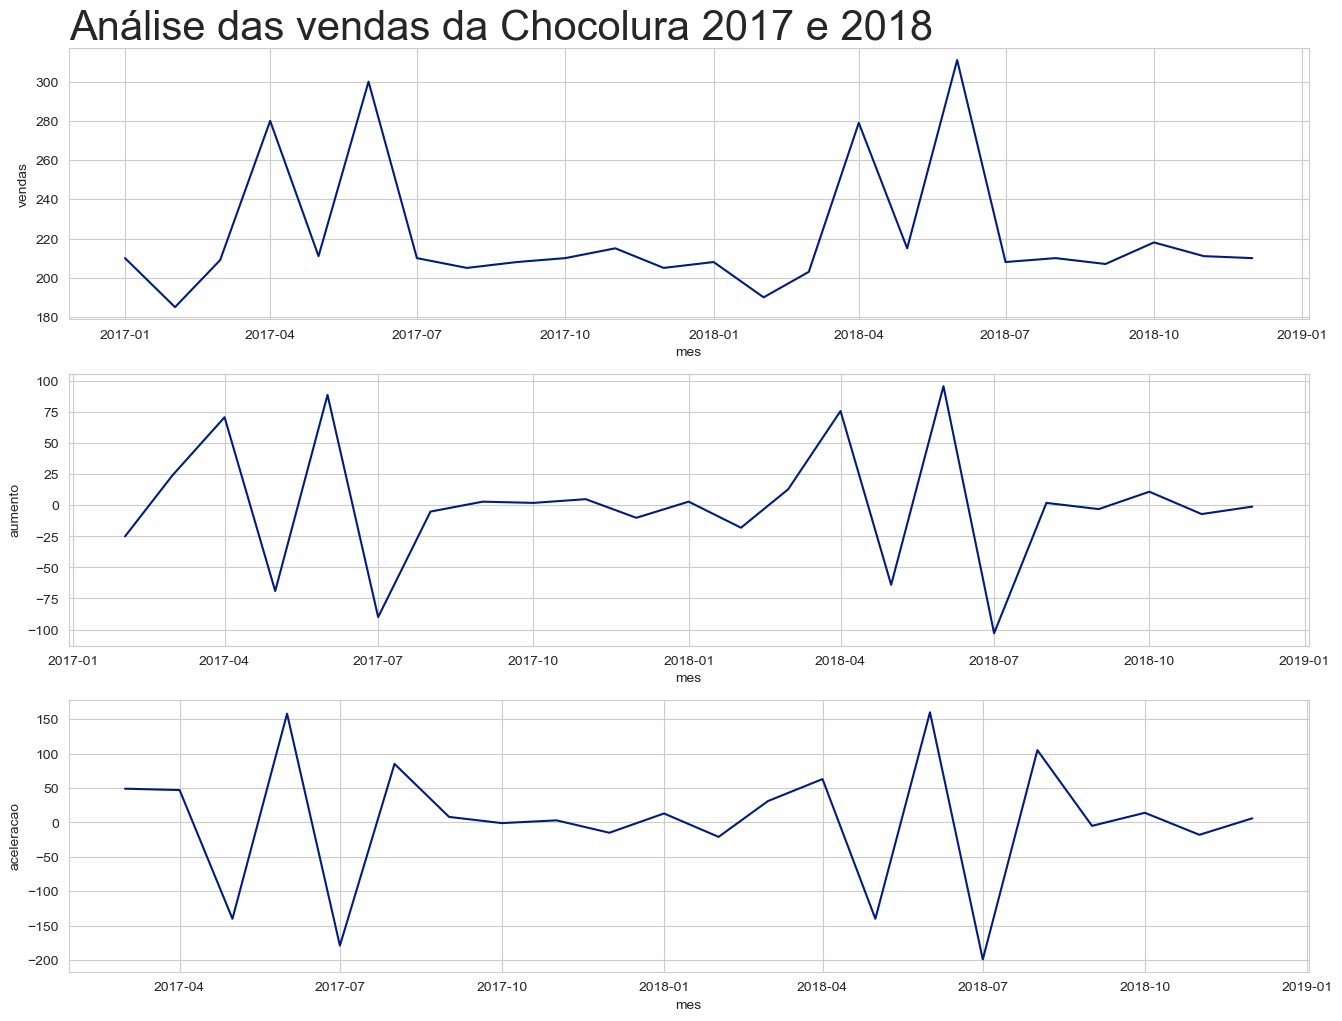

In [45]:
plot_comparacao(dataset=chocolura, titulo='Análise das vendas da Chocolura 2017 e 2018')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [46]:
chocolura_dia = pd.read_csv('dados/vendas_por_dia.csv')
chocolura_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [47]:
print(f'Quantidade de linhas: {chocolura_dia.shape[0]}\nQuantidade de colunas: {chocolura_dia.shape[1]}')
print(f'Quantidade de valores nulos: {chocolura_dia.isna().sum().sum()}')

Quantidade de linhas: 61
Quantidade de colunas: 2
Quantidade de valores nulos: 0


In [48]:
chocolura_dia.dtypes

dia       object
vendas     int64
dtype: object

In [49]:
chocolura_dia['dia'] = pd.to_datetime(chocolura_dia['dia'])

In [50]:
chocolura_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [51]:
chocolura_dia['aumento'] = chocolura_dia['vendas'].diff()

In [52]:
chocolura_dia['aceleracao'] = chocolura_dia['aumento'].diff()

In [53]:
chocolura_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


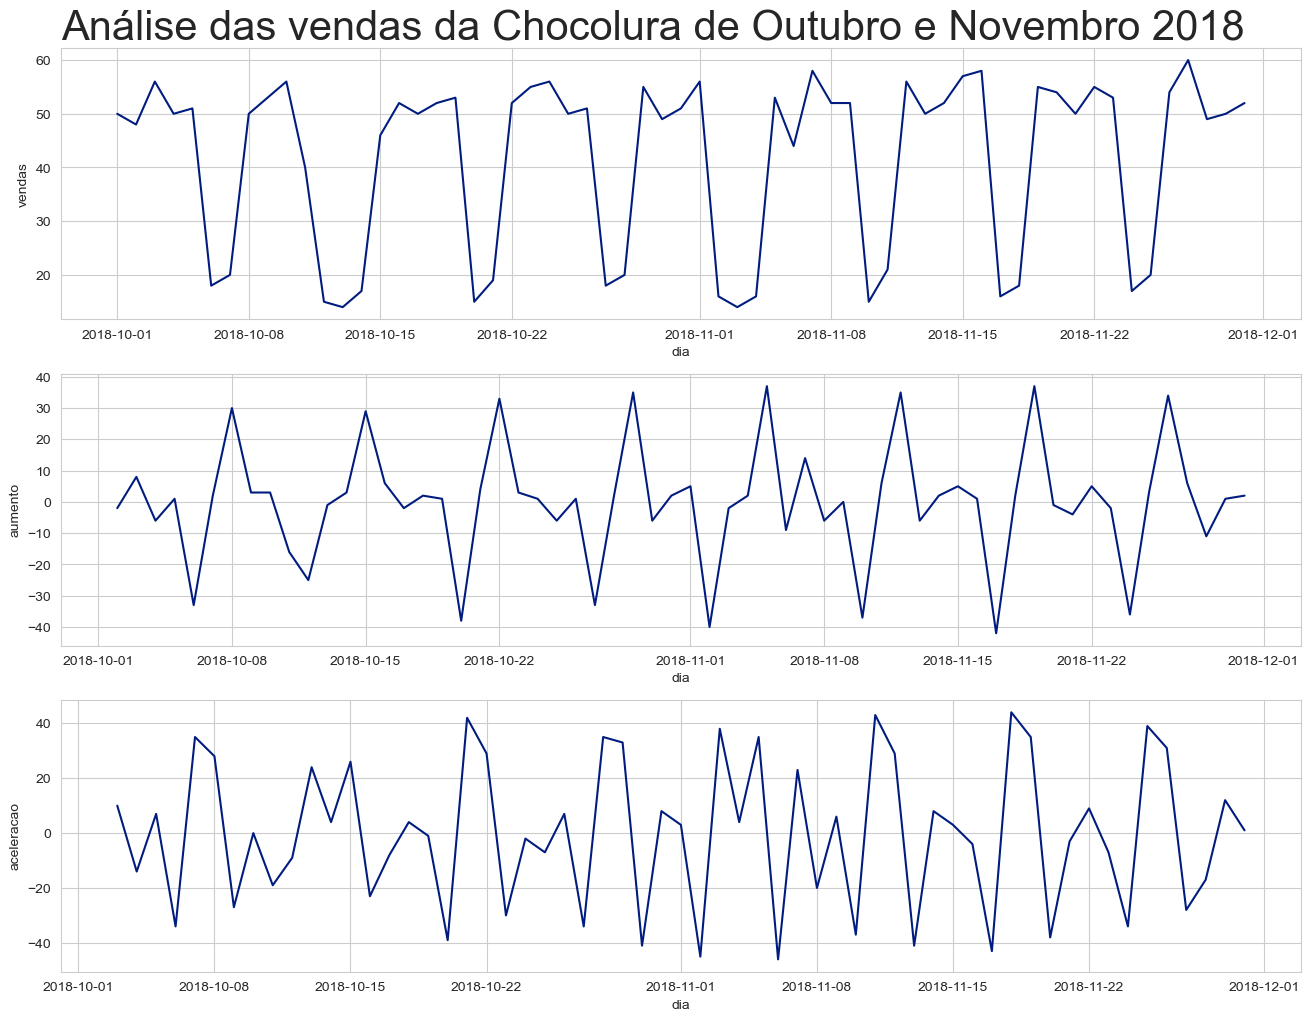

In [54]:
plot_comparacao(x='dia', dataset=chocolura_dia, titulo='Análise das vendas da Chocolura de Outubro e Novembro 2018')

## Analisando a sazonalidade 

In [55]:
chocolura_dia['dia_da_semana'] = chocolura_dia['dia'].dt.day_name()

In [56]:
chocolura_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [57]:
chocolura_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [58]:
map = {
    'Monday' : 'Segunda-Feira', 
    'Tuesday' : 'Terça-Feira', 
    'Wednesday' : 'Quarta-Feira', 
    'Thursday' : 'Quita-Feira',
    'Friday' : 'Sexta-Feria', 
    'Saturday' : 'Sábado',
    'Sunday' : 'Domingo'
}

chocolura_dia['dia_da_semana'] = chocolura_dia['dia_da_semana'].map(map)

In [59]:
chocolura_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda-Feira
1,2018-10-02,48,-2.0,NaN,Terça-Feira
2,2018-10-03,56,8.0,10.0,Quarta-Feira
3,2018-10-04,50,-6.0,-14.0,Quita-Feira
4,2018-10-05,51,1.0,7.0,Sexta-Feria


### Agrupando os dias

In [60]:
vendas_agrupadas = chocolura_dia.groupby('dia_da_semana')['vendas', 'aumento','aceleracao'].mean().round()

C:\Users\Senai\AppData\Local\Temp\ipykernel_7680\3427871295.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = chocolura_dia.groupby('dia_da_semana')['vendas', 'aumento','aceleracao'].mean().round()


In [61]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta-Feira,53.0,1.0,2.0
Quita-Feira,51.0,-2.0,-3.0
Segunda-Feira,52.0,34.0,31.0
Sexta-Feria,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça-Feira,52.0,-1.0,-34.0


# Correlação das vendas diárias

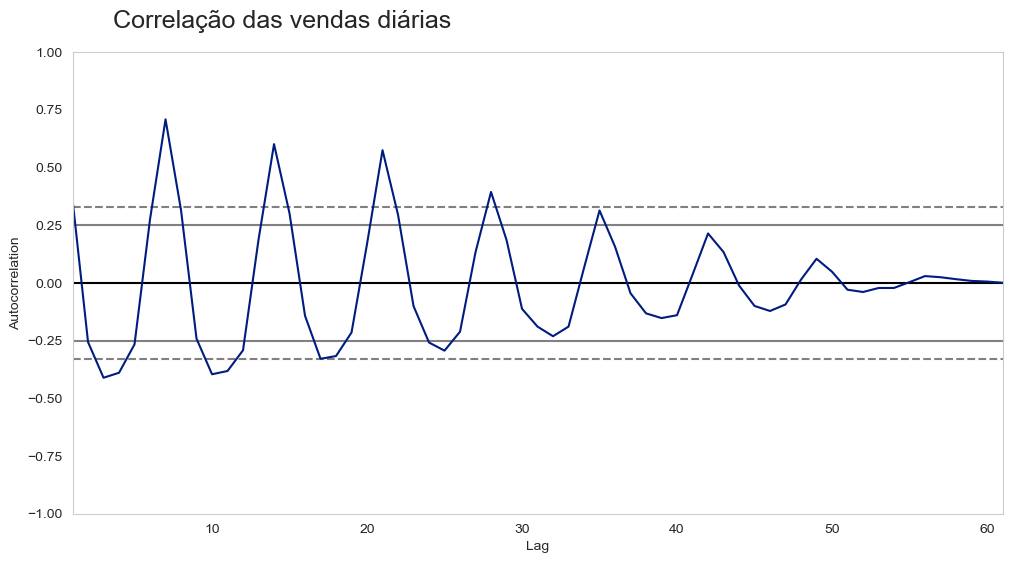

In [62]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(chocolura_dia['vendas'])
ax = ax

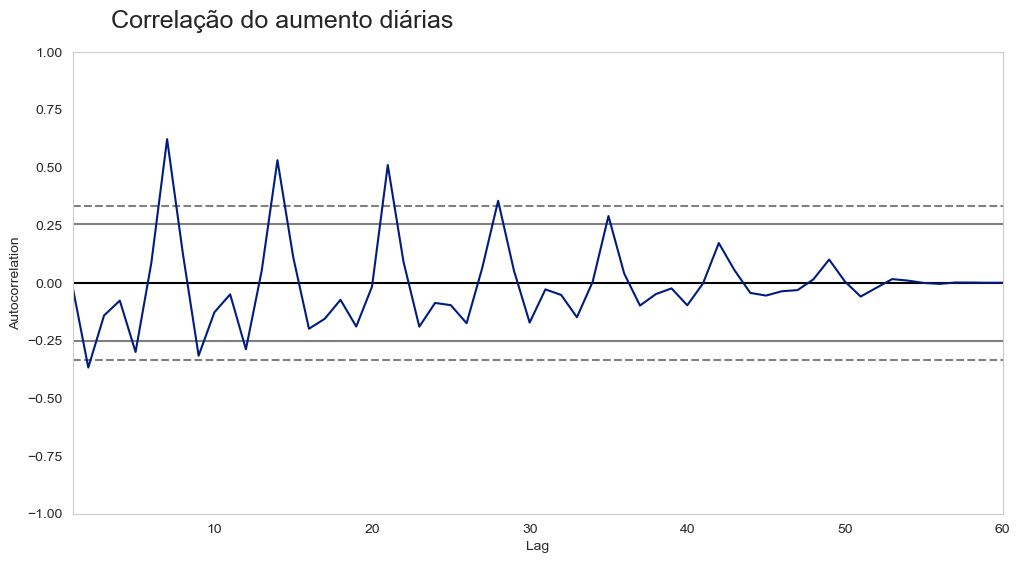

In [63]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(chocolura_dia['aumento'][1:])
ax = ax

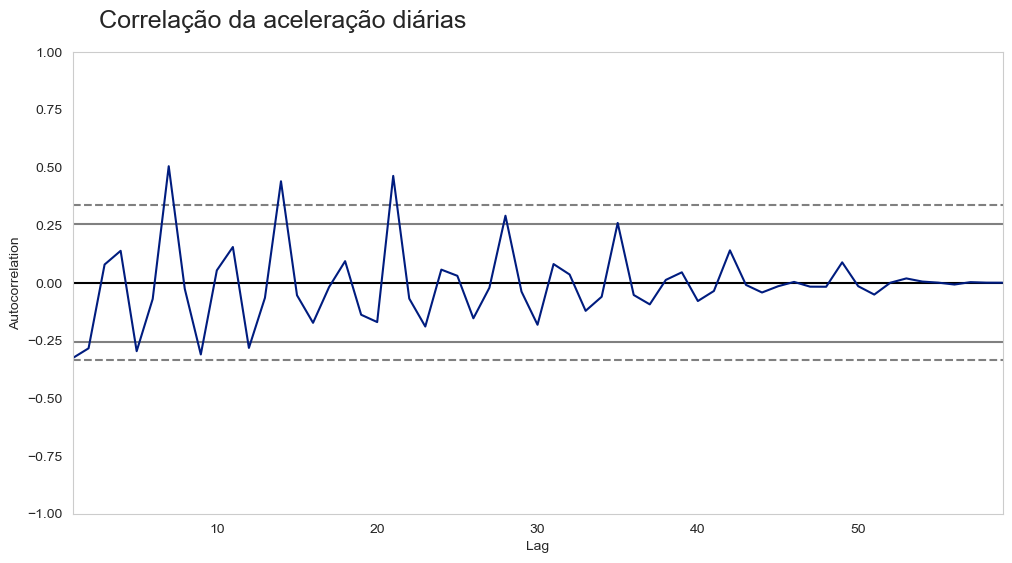

In [64]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(chocolura_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de vendas

In [65]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [66]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [67]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [68]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [69]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [70]:
print(f'''Quantidade de linhas: {cafelura.shape[0]}
Quantidade de colunas: {cafelura.shape[1]}
Quantidade de valores nulos: {cafelura.isna().sum().sum()}''')

Quantidade de linhas: 24
Quantidade de colunas: 2
Quantidade de valores nulos: 0


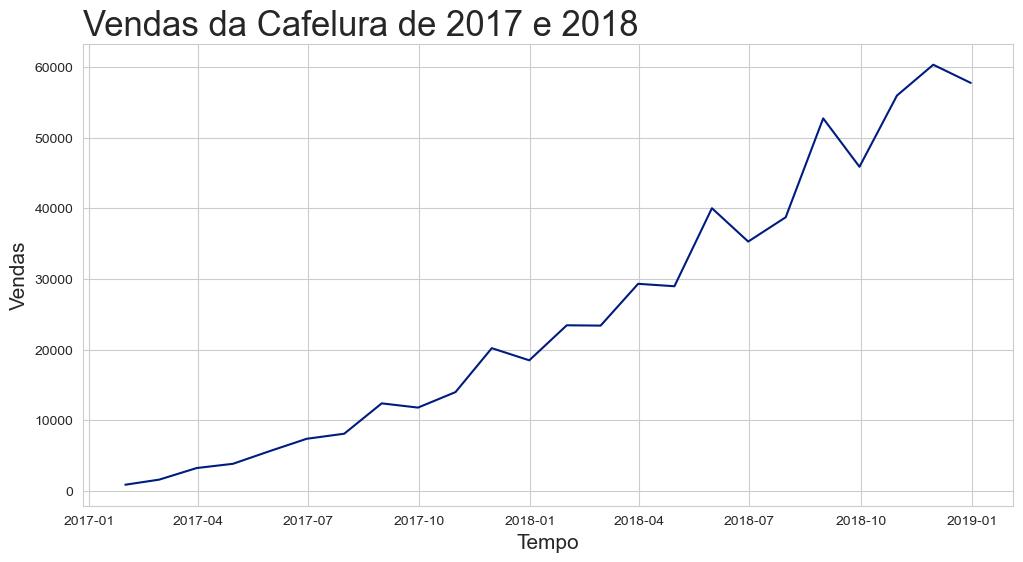

In [71]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [72]:
quantidade_de_dias_de_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [73]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [74]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


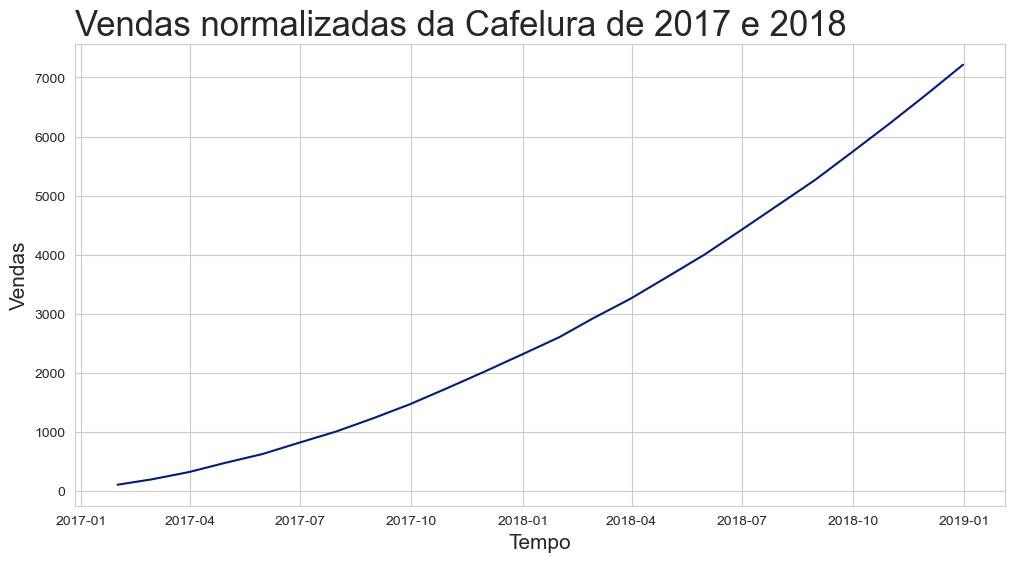

In [75]:
plotar('Vendas normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas_normalizadas', cafelura)

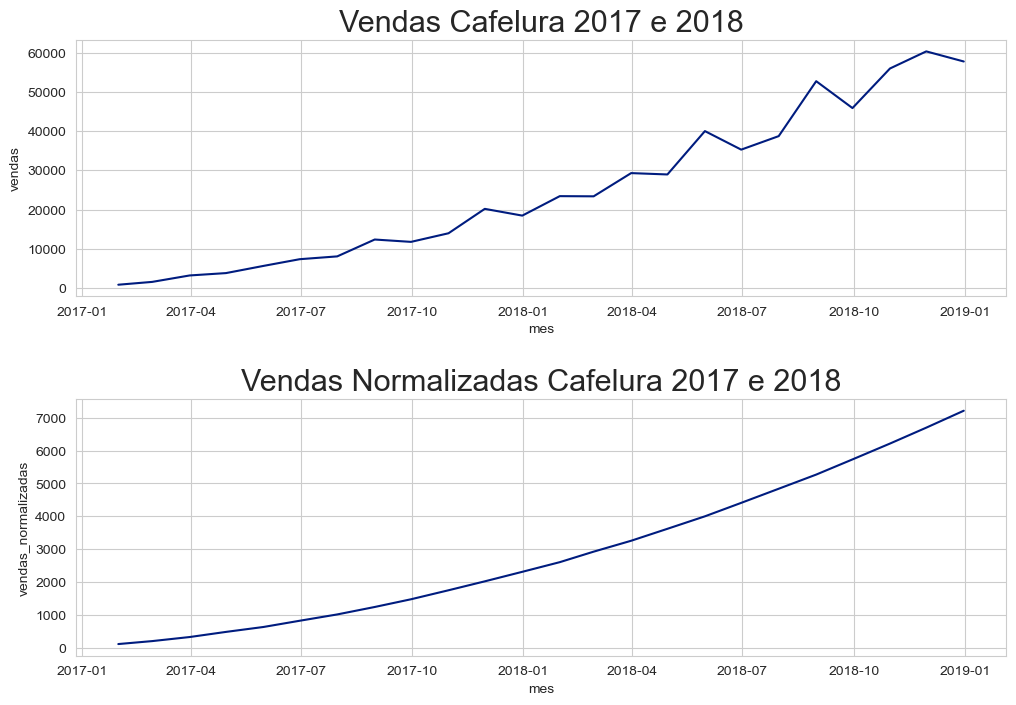

In [76]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=22)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=22)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
plt.subplots_adjust(hspace=0.4)

# Statsmodels

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

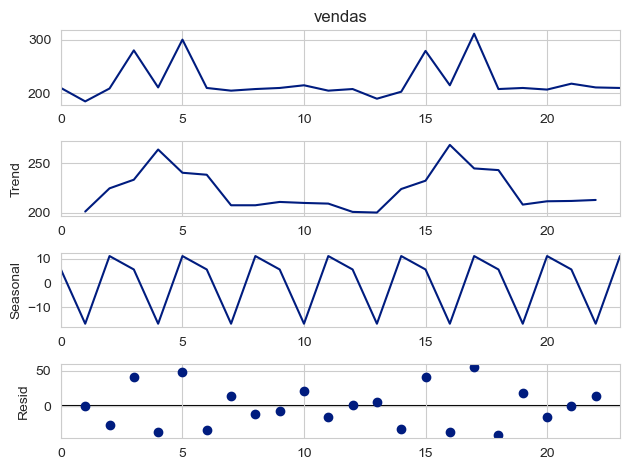

In [78]:
resultado = seasonal_decompose(chocolura['vendas'], period = 3)
ax = resultado.plot()

In [79]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [80]:
data= ({
    'observacao' : observacao,
    'tendencia' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruido' : ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


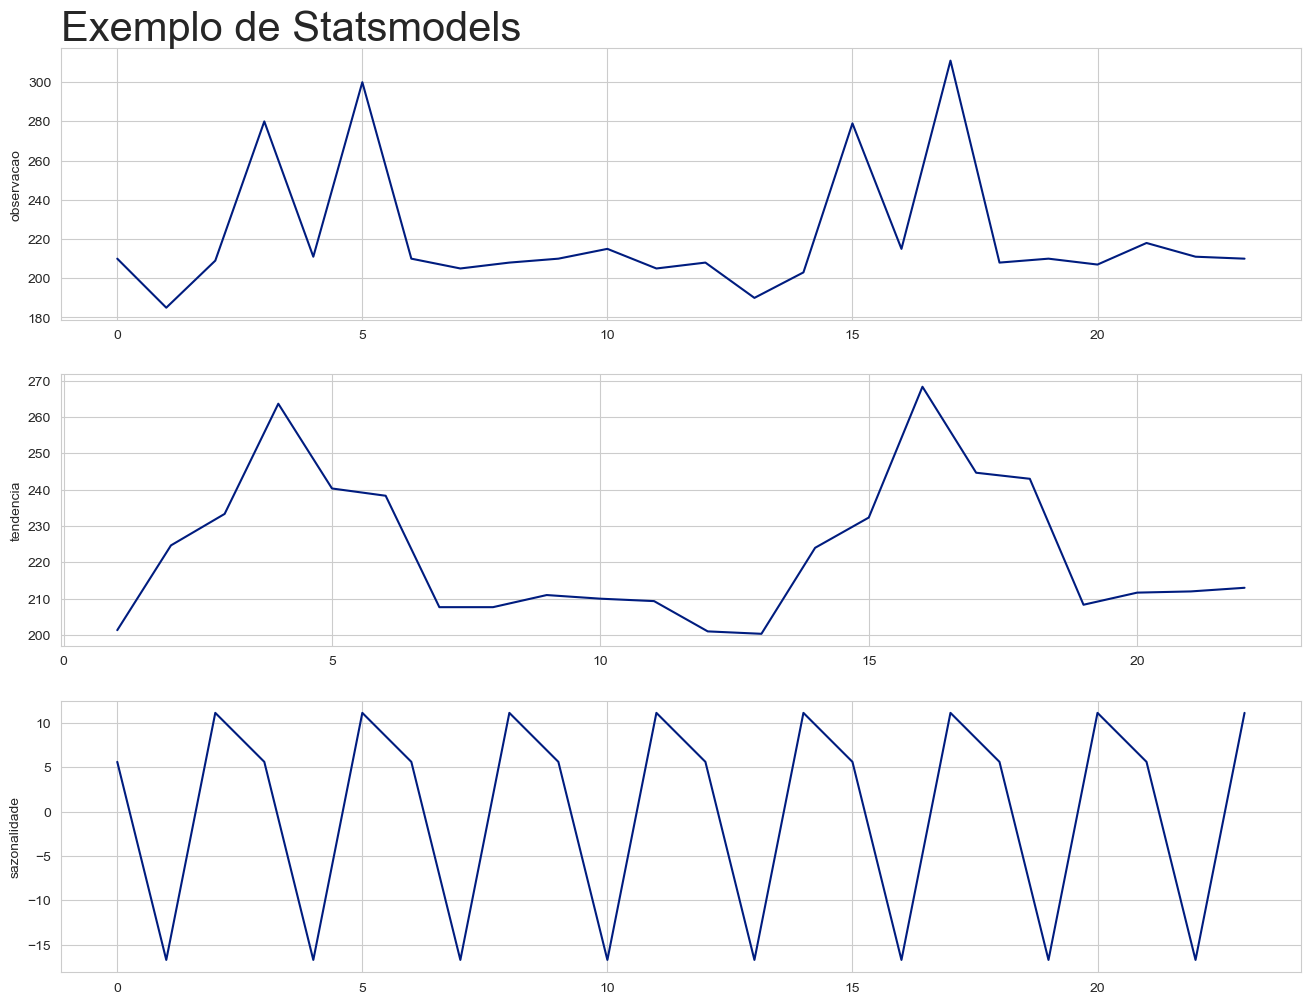

In [82]:
plot_comparacao(x=resultado.index, y1='observacao', y2='tendencia', y3='sazonalidade', dataset=resultado, titulo='Exemplo de Statsmodels')

# Alucel - Anásile de vendas

In [83]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [84]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [85]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [86]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [88]:
print(f'Quantidade de linhas: {alucel.shape[0]}\nQuantidade de colunas: {alucel.shape[1]}')
print(f'Quantidade de valore nulos: {alucel.isna().sum().sum()}')

Quantidade de linhas: 61
Quantidade de colunas: 2
Quantidade de valore nulos: 0


In [89]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [90]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


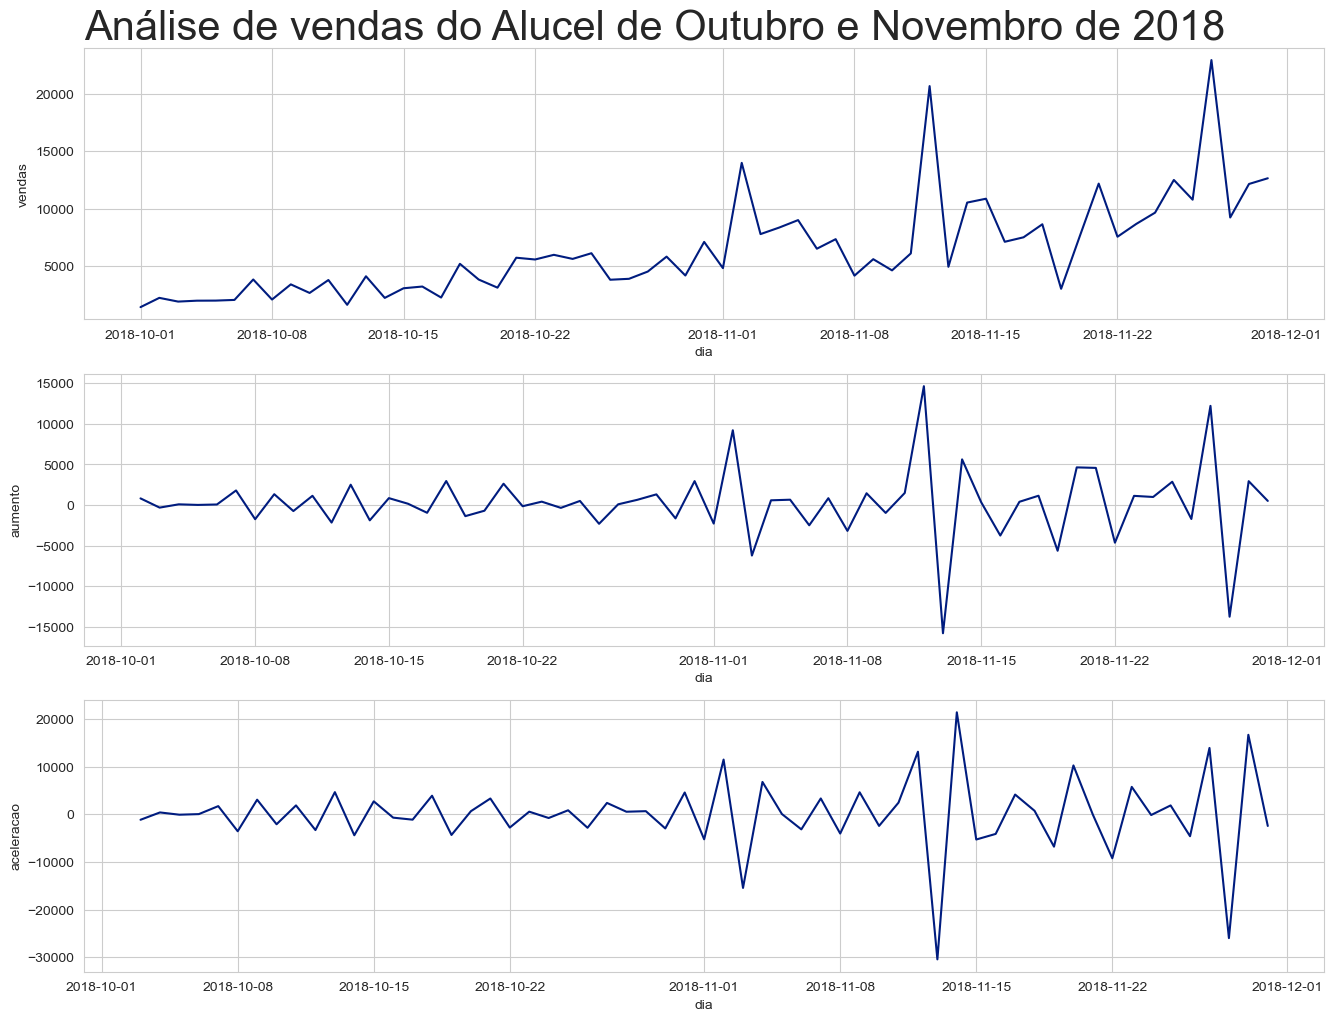

In [95]:
plot_comparacao(x='dia', y1='vendas', y2='aumento', y3='aceleracao', dataset=alucel, titulo='Análise de vendas do Alucel de Outubro e Novembro de 2018')

# Média móvel

In [96]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [98]:
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


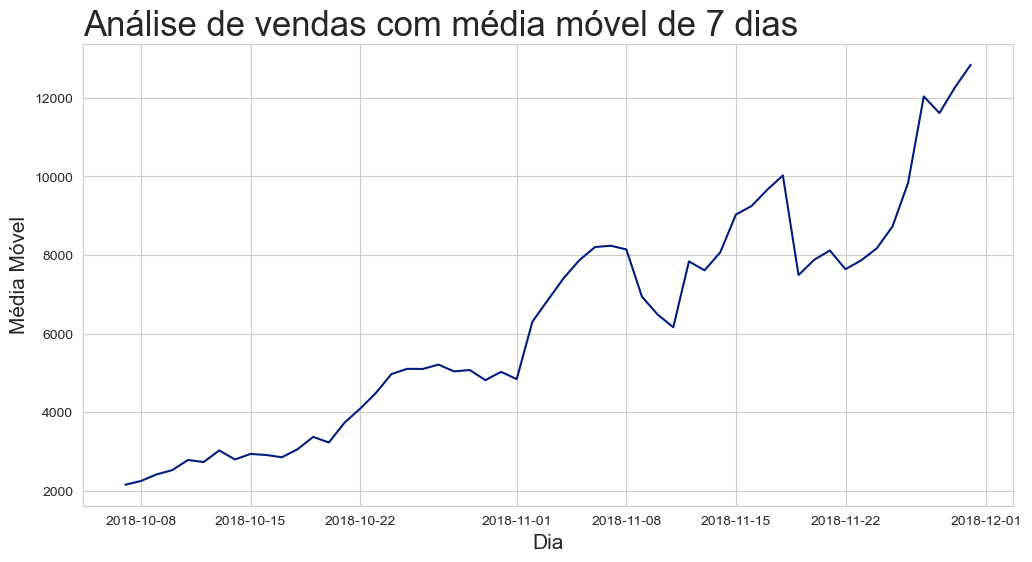

In [99]:
plotar('Análise de vendas com média móvel de 7 dias', 'Dia', 'Média Móvel', 'dia', 'media_movel', alucel)

In [100]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

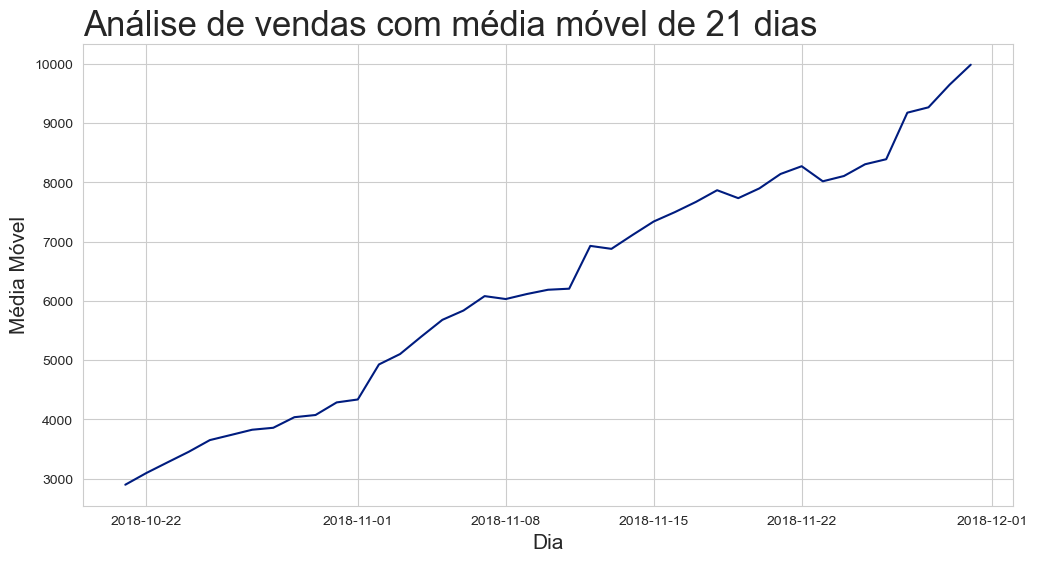

In [101]:
plotar('Análise de vendas com média móvel de 21 dias', 'Dia', 'Média Móvel', 'dia', 'media_movel_21', alucel)

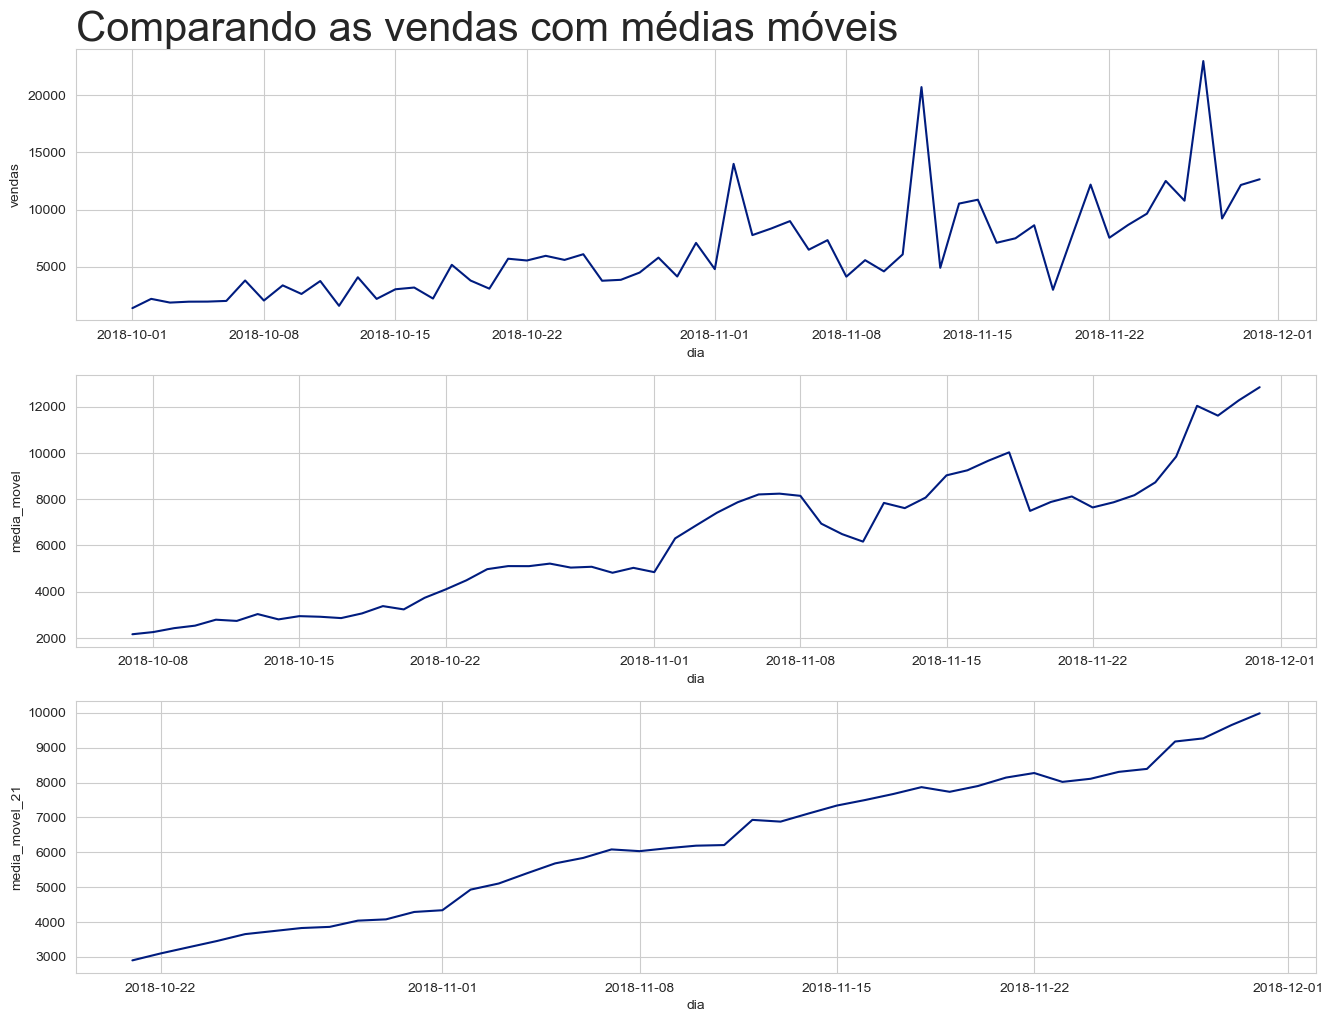

In [102]:
plot_comparacao(x='dia', y1='vendas', y2='media_movel', y3='media_movel_21', dataset=alucel, titulo='Comparando as vendas com médias móveis')